In [21]:
from IPython.display import SVG

import numpy as np
from scipy import sparse
import pandas as pd

from sknetwork.utils import edgelist2adjacency, edgelist2biadjacency
from sknetwork.data import convert_edge_list, load_edge_list, house, bow_tie, karate_club, miserables, painters, hourglass, star_wars, movie_actor

from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

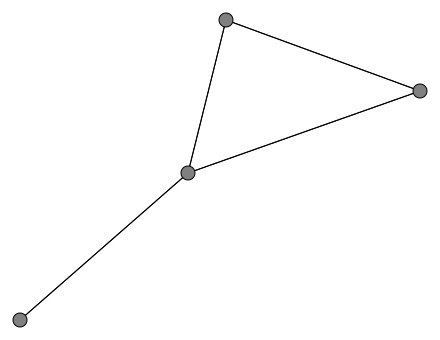

In [3]:
adjacency = np.array([[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0]])
adjacency = sparse.csr_matrix(adjacency)

image = svg_graph(adjacency)
SVG(image)

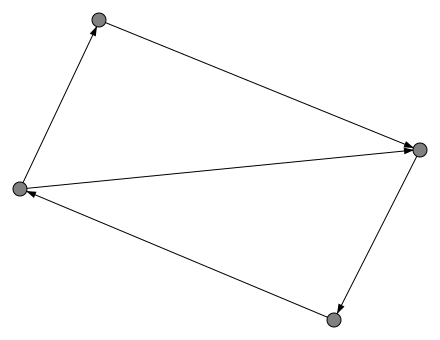

In [4]:
edge_list = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]
adjacency = edgelist2adjacency(edge_list)

image = svg_digraph(adjacency)
SVG(image)

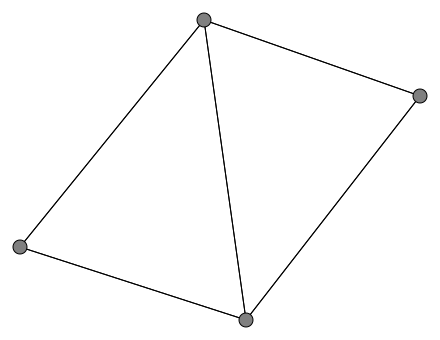

In [5]:
adjacency = edgelist2adjacency(edge_list, undirected=True)

image = svg_graph(adjacency)
SVG(image)

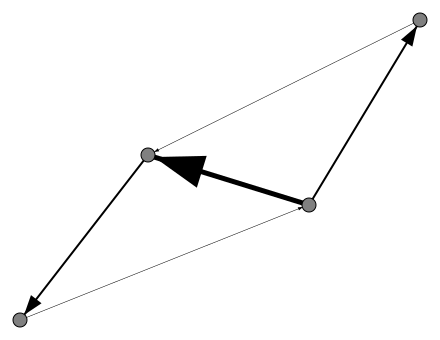

In [6]:
edge_list = [(0, 1, 1), (1, 2, 0.5), (2, 3, 1), (3, 0, 0.5), (0, 2, 2)]
adjacency = edgelist2adjacency(edge_list)

image = svg_digraph(adjacency)
SVG(image)

In [12]:
df = pd.read_csv('testdata.csv', names=['source', 'target'])
df

,source,target
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,6,1
6,7,2
7,8,2
8,9,2
9,1,3


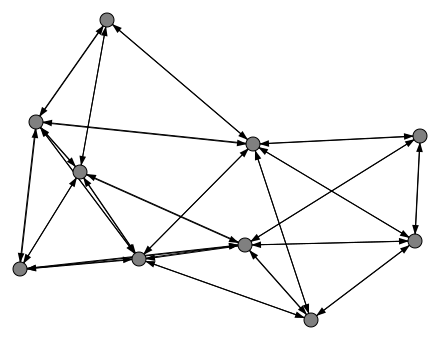

In [20]:
edge_list = list(df.itertuples(index=False))
graph = convert_edge_list(edge_list)
adjacency = graph.adjacency
image = svg_digraph(adjacency)
SVG(image)

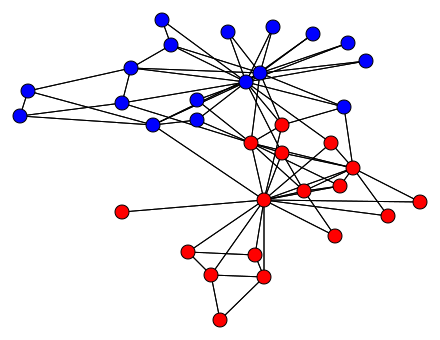

In [22]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels = graph.labels
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

# Shortest path from attack source to user

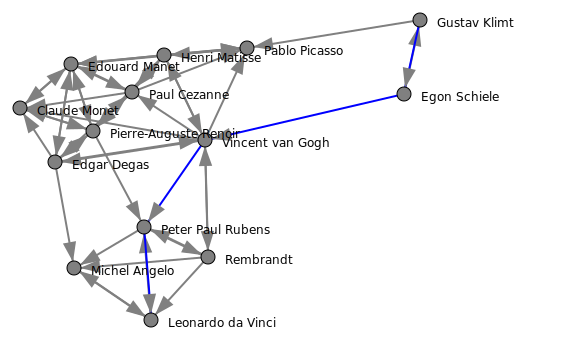

In [33]:
from sknetwork.path import shortest_path

graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

klimt = 6
vinci = 9

path = shortest_path(adjacency, sources=klimt, targets=vinci)

edge_labels = [(path[k], path[k + 1], 0) for k in range(len(path) - 1)]

image = svg_digraph(adjacency, position, names, edge_labels=edge_labels, edge_width=2)
SVG(image)